In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
games = pd.read_csv("games.csv")

In [10]:
games.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [11]:
games.tail()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
81307,184441,boardgameexpansion,Micro Rome: Aegyptus,2015.0,1.0,1.0,0.0,30.0,0.0,10.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81308,184442,boardgame,Trivial Pursuit: Marvel Cinematic Universe Da...,2013.0,2.0,0.0,0.0,0.0,0.0,12.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81309,184443,boardgame,BEARanoia,2015.0,2.0,15.0,1.0,1.0,1.0,0.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81310,184449,boardgame,Freight,2015.0,2.0,4.0,60.0,30.0,60.0,8.0,0,0.0,0.0,0,0,0,0,0,0,0.0
81311,184451,boardgame,Bingo Animal Kids,2010.0,1.0,6.0,10.0,10.0,10.0,2.0,0,0.0,0.0,0,0,0,0,0,0,0.0


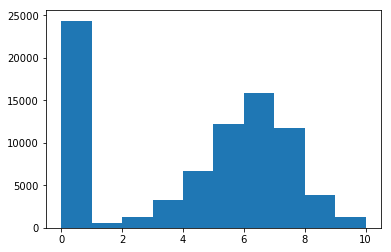

In [12]:
plt.hist(games["average_rating"])


plt.show()

My conclusion : there are a lot of games with average rating of 0.

In [13]:

#game with average rating = 0
print(games[games["average_rating"] == 0].iloc[0])


id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object


In [15]:
#game with average rating > 0
print(games[games["average_rating"] > 0].iloc[0])

id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime                           180
minplaytime                           180
maxplaytime                           180
minage                                 13
users_rated                         20113
average_rating                    8.33774
bayes_average_rating              8.22186
total_owners                        26647
total_traders                         372
total_wanters                        1219
total_wishers                        5865
total_comments                       5347
total_weights                        2562
average_weight                     3.4785
Name: 0, dtype: object


In [16]:
games = games[games["users_rated"] > 0]
# Remove any rows with missing values.
games = games.dropna(axis=0)

In [21]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


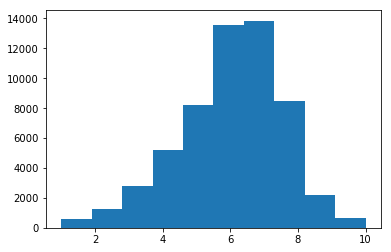

In [23]:
plt.hist(games["average_rating"])


plt.show()

After removing games with 0 user_rating, the histogram looks like this. 

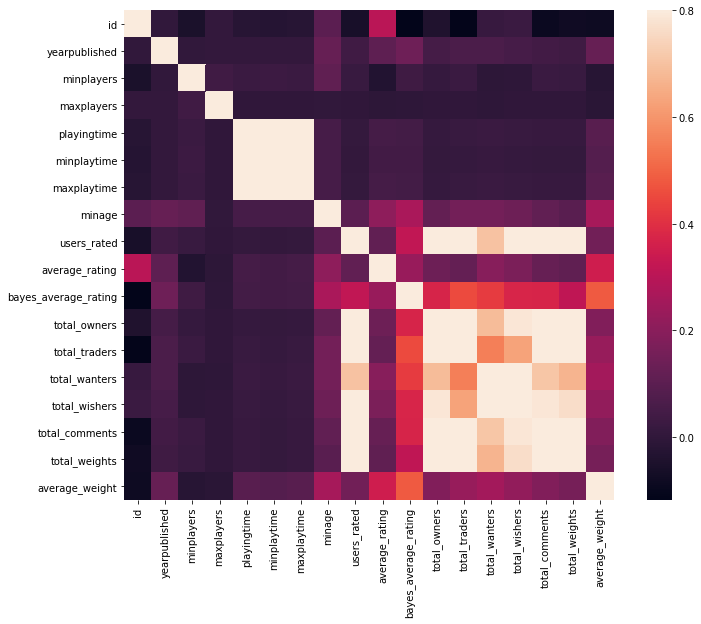

In [24]:
#analysing correlation
corrmat = games.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Observations:

1) playtime is related with min_playing_time and max_playing_time 

2) average_rating is higly correlated with the id and id does not provide any important information about the rating,So I will remove it.

3) Other columns which do not provide any information are bayes_average_rating,type,name.

In [28]:
columns = games.columns.tolist()


In [29]:
columns = [c for c in columns if c not in ["bayes_average_rating", "average_rating", "type", "name", "id"]]

In [30]:
target = "average_rating"

In [31]:
train = games.sample(frac=0.8, random_state=1)

test = games.loc[~games.index.isin(train.index)]

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [46]:
 from sklearn.linear_model import LinearRegression


modelLR = LinearRegression()
modelLR.fit(train[columns], train[target])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
from sklearn.metrics import mean_squared_error


predictions = modelLR.predict(test[columns])


mean_squared_error(predictions, test[target])  #mean squard error

2.0788190326293248

In [37]:
from sklearn.ensemble import RandomForestRegressor


model = RandomForestRegressor(n_estimators=25, min_samples_leaf=10, random_state=1)

model.fit(train[columns], train[target])



RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=10, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [38]:
predictions = model.predict(test[columns])

mean_squared_error(predictions, test[target])

1.4564730102865069

In [82]:
test[columns].iloc[10]

yearpublished     2006.0000
minplayers           2.0000
maxplayers           2.0000
playingtime         60.0000
minplaytime         60.0000
maxplaytime         60.0000
minage              12.0000
users_rated       6080.0000
total_owners      7770.0000
total_traders      213.0000
total_wanters      574.0000
total_wishers     2057.0000
total_comments    2204.0000
total_weights      943.0000
average_weight       2.6914
Name: 48, dtype: float64

In [83]:
test_data = test[columns].iloc[10].values.reshape(1,-1)

In [84]:
test_data

array([[2.0060e+03, 2.0000e+00, 2.0000e+00, 6.0000e+01, 6.0000e+01,
        6.0000e+01, 1.2000e+01, 6.0800e+03, 7.7700e+03, 2.1300e+02,
        5.7400e+02, 2.0570e+03, 2.2040e+03, 9.4300e+02, 2.6914e+00]])

#### Predicting a specific data row with both the models

In [85]:
test_LR = modelLR.predict(test_data)[0]

In [86]:
test_RFR = model.predict(test_data)[0]

In [87]:
actual = test[target].iloc[264]

In [88]:
print("Prediction based on Linear Regression Model = {:.5f}".format(test_LR))
print("Prediction based on Random Forest Model = {:.5f}".format(test_RFR))
print("Actual Rating = {:.5f}".format(actual))

Prediction based on Linear Regression Model = 8.40217
Prediction based on Random Forest Model = 7.44228
Actual Rating = 6.62866
